In [64]:
import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

This script associates postcodes with local authority district codes (LAD) and merged LADs of 2011 which are used in the flow data do measure the distances from home to work.

In [6]:
dirs = "/home/christovis/Downloads/"
flow_df = pd.read_csv(
    dirs+"wu01ew_mlad_level_2011.csv",
    skiprows=10,
    skipfooter=7,
    delimiter=',',
    delim_whitespace=False,
)
flow_df = flow_df.set_index('mlad_id')

m_lad_df = pd.read_csv(
    dirs+"uk_local_authorities_merged_2011.csv",
    delimiter=',',
    delim_whitespace=False,
)
m_lad_df = m_lad_df.set_index('mlad_id')

flow_df = flow_df.merge(m_lad_df, left_index=True, right_index=True)
flow_df.to_csv("flow_in_mlad_lad.csv")
flow_df

<ipython-input-6-cb6838bf6c0c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  flow_df = pd.read_csv(


,mlad_name,E41000001,E41000002,E41000003,E41000004,E41000005,E41000047,E41000048,E41000276,E41000277,...,W40000017,W40000018,W40000019,W40000020,W40000021,W40000022,Number,lad_id,LAD label,LAD name (Welsh label)
mlad_id,,,,,,,,,,,,,,,,,,,,,
E41000001,Hartlepool,20777,1591,534,3865,433,2269,47,173,310,...,28,0,0,0,0,0,1,E06000001,Hartlepool,NaN
E41000002,Middlesbrough,990,25474,5111,8889,1030,710,54,120,202,...,0,0,0,0,0,0,2,E06000002,Middlesbrough,NaN
E41000003,Redcar and Cleveland,558,10569,25106,5387,682,465,47,109,170,...,1,1,0,0,0,0,3,E06000003,Redcar and Cleveland,NaN
E41000004,Stockton-on-Tees,2590,10779,3652,44337,3317,2513,91,328,557,...,1,0,0,2,0,0,4,E06000004,Stockton-on-Tees,NaN
E41000005,Darlington,266,1300,467,3014,26671,4629,80,222,418,...,0,0,1,0,1,0,5,E06000005,Darlington,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W40000018,Torfaen,0,0,0,1,0,4,0,0,0,...,707,19660,2459,6064,163,94,374,W06000020,Torfaen,Tor-faen
W40000019,Monmouthshire,0,0,0,0,0,3,2,1,2,...,739,2289,15266,3985,580,147,375,W06000021,Monmouthshire,Sir Fynwy
W40000020,Newport,0,0,0,2,0,4,10,1,0,...,209,3999,1803,34375,40,87,376,W06000022,Newport,Casnewydd


In [7]:
pcd_lda_dir = "/home/christovis/PhD/5_COVID_19/"
pcd_lda_df = pd.read_csv(
    pcd_lda_dir+"pcd11_par11_wd11_lad11_ew_lu.csv",
    delimiter=',',
    delim_whitespace=False,
    encoding = "ISO-8859-1",
)
pcd_lda_df = pcd_lda_df.drop(columns=["pcd7", "pcd8", "par11cd", "par11nm", "par11nmw"])
pcd_lda_df = pcd_lda_df.set_index('pcds')

pcd_dir = "/home/christovis/PhD/5_COVID_19/covidmodelling/data/census_data/postcode/"
pcd_df = pd.read_csv(
    pcd_dir+"uk_postcode_population.csv",
    delimiter=',',
    delim_whitespace=False,
    #encoding = "ISO-8859-1",
)
pcd_df = pcd_df.set_index('Postcode')

pcd_df = pcd_df.merge(pcd_lda_df, left_index=True, right_index=True)
pcd_df.to_csv("postcodes_in_mlad_lad.csv")
pcd_df

/home/christovis/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Total,Occupied_Households,wd11cd,wd11nm,wd11nmw,lad11cd,lad11nm,lad11nmw
AL1 1AG,14,6,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
AL1 1AJ,124,51,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
AL1 1AR,32,17,E05004789,Cunningham,NaN,E07000100,St Albans,NaN
AL1 1AS,34,13,E05004799,St Peters,NaN,E07000100,St Albans,NaN
AL1 1BH,52,41,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
...,...,...,...,...,...,...,...,...
YO8 9YA,23,8,E05006349,Hambleton,NaN,E07000169,Selby,NaN
YO8 9YB,33,13,E05006349,Hambleton,NaN,E07000169,Selby,NaN
YO8 9YD,9,4,E05006349,Hambleton,NaN,E07000169,Selby,NaN
YO8 9YE,13,3,E05006349,Hambleton,NaN,E07000169,Selby,NaN


In [8]:
flow_df[flow_df["lad_id"] == "E07000100"]

,mlad_name,E41000001,E41000002,E41000003,E41000004,E41000005,E41000047,E41000048,E41000276,E41000277,...,W40000017,W40000018,W40000019,W40000020,W40000021,W40000022,Number,lad_id,LAD label,LAD name (Welsh label)
mlad_id,,,,,,,,,,,,,,,,,,,,,
E41000132,St Albans,2,2,0,0,2,14,0,2,4,...,1,0,2,1,2,0,131,E07000100,St Albans,NaN


In [30]:
# read in the constituency polygon boundaries for Great Britain into a GeoDataFrame:
dirs = "/home/christovis/Downloads/Census_Merged_Local_Authority_Districts_December_2011_Generalised_Clipped_Boundaries_in_Great_Britain/"
uk_shape = gpd.read_file(
    dirs+'Census_Merged_Local_Authority_Districts_December_2011_Generalised_Clipped_Boundaries_in_Great_Britain.shp'
)
uk_shape = uk_shape.set_index('cmlad11cd')

In [31]:
uk_shape

,objectid,cmlad11nm,cmlad11nmw,st_areasha,st_lengths,geometry
cmlad11cd,,,,,,
E41000001,1,Hartlepool,None,9.389290e+07,68996.677754,"MULTIPOLYGON (((447096.998 537151.999, 447228...."
E41000002,2,Middlesbrough,None,5.386184e+07,44917.925537,"MULTIPOLYGON (((449861.800 521260.701, 449853...."
E41000003,3,Redcar and Cleveland,None,2.449159e+08,93270.866874,"MULTIPOLYGON (((455776.699 528322.500, 455684...."
E41000004,4,Stockton-on-Tees,None,2.039201e+08,155579.742599,"MULTIPOLYGON (((444110.400 528008.200, 444163...."
E41000039,39,Slough,None,3.253413e+07,43424.361153,"POLYGON ((495475.200 183018.403, 495751.603 18..."
...,...,...,...,...,...,...
W40000017,341,Blaenau Gwent,Blaenau Gwent,1.087552e+08,64568.581571,"POLYGON ((314051.298 213683.699, 314698.400 21..."
W40000018,342,Torfaen,Tor-faen,1.261927e+08,78799.522117,"POLYGON ((323823.999 211338.001, 324481.002 21..."
W40000019,343,Monmouthshire,Sir Fynwy,8.503026e+08,217940.993032,"MULTIPOLYGON (((327822.000 231019.601, 327871...."


In [32]:
uk_shape.cmlad11nm.values

array(['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland',
       'Stockton-on-Tees', 'Slough', 'Darlington', 'Halton',
       'Kingston upon Hull, City of', 'East Riding of Yorkshire',
       'Warrington', 'Blackburn with Darwen', 'Blackpool',
       'North East Lincolnshire', 'York', 'Derby', 'North Lincolnshire',
       'Leicester', 'Rutland', 'Nottingham', 'Herefordshire, County of',
       'Telford and Wrekin', 'Stoke-on-Trent',
       'Bath and North East Somerset', 'Bournemouth', 'Bristol, City of',
       'Poole', 'Lambeth', 'North Somerset', 'Luton',
       'South Gloucestershire', 'Southend-on-Sea', 'Plymouth', 'Torbay',
       'Swindon', 'Peterborough', 'Thurrock', 'Bracknell Forest',
       'Windsor and Maidenhead', 'Medway', 'Northumberland',
       'Cheshire East', 'Cheshire West and Chester', 'Shropshire',
       'Cornwall,Isles of Scilly', 'Wiltshire', 'West Berkshire',
       'Reading', 'Wokingham', 'Milton Keynes', 'Coventry',
       'Brighton and Hove', 'Portsmout

In [56]:
uk_shape[uk_shape["cmlad11nm"] == "Norwich"]

,objectid,cmlad11nm,cmlad11nmw,st_areasha,st_lengths,geometry
cmlad11cd,,,,,,
E41000180,180,Norwich,None,3.901292e+07,51306.313158,"MULTIPOLYGON (((623196.300 313903.099, 623174...."


In [73]:
region_shape = uk_shape.merge(flow_df["E41000180"], left_index=True, right_index=True)

(250000.0, 400000.0)

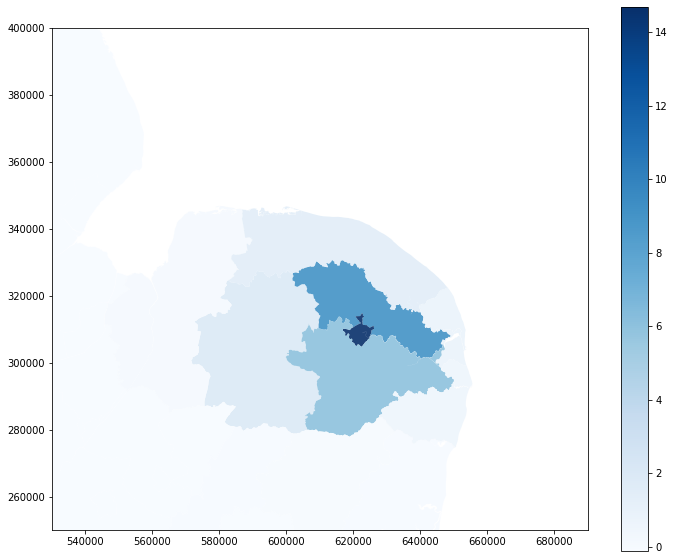

In [77]:
# Visiualization of where people who live in Norwich go to work 

region_shape = uk_shape.merge(flow_df["E41000180"], left_index=True, right_index=True)
region_shape["E41000180"] = (region_shape["E41000180"].values-region_shape["E41000180"].values.mean()) / \
    region_shape["E41000180"].values.std()

fig, ax = plt.subplots(
    figsize=(12, 10),
)
region_shape.plot(
    column='E41000180',
    ax=ax,
    legend=True,
    cmap=cm.Blues,
    alpha=0.9,
    categorical=False,
)
ax.set_xlim(530000, 690000)
ax.set_ylim(250000, 400000)